In [49]:
#THIS CODE IS WRITTEN BY REFERRING TO THE CODE IN THE FOLLOWING LINK
#https://realpython.com/generative-adversarial-networks/ 

In [37]:
import torch 
import torch.nn as nn
import math 
import matplotlib.pyplot as plt
from tqdm import tqdm


In [38]:
torch.manual_seed(0)

In [39]:
train_data_length = 1024

train_data = torch.zeros((train_data_length, 2))

train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)

train_data[:, 1] = torch.cos(train_data[:, 0])

train_labels = torch.zeros(train_data_length)

train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

In [44]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)


In [45]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(2,256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64,1),
            nn.Sigmoid(),
        )
    def forward(self,x):
        output=self.model(x)
        return output
discriminator=Discriminator()

In [46]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(2,16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32,2),
        )
    def forward(self,x):
        output=self.model(x)
        return output
generator=Generator()

In [47]:
lr=0.001
num_epochs=300
loss_function=nn.BCELoss()
discriminator_optimizer=torch.optim.Adam(discriminator.parameters(),lr=lr)
generator_optimizer=torch.optim.Adam(generator.parameters(),lr=lr)


100%|██████████| 300/300 [00:31<00:00,  9.57it/s]


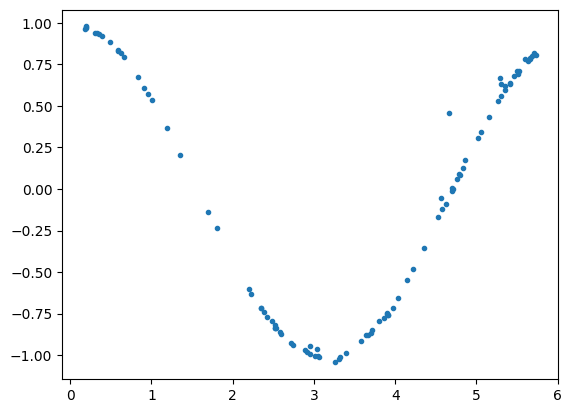

In [50]:
for epoch in tqdm(range(num_epochs)):
    for n,(real_samples,_) in enumerate(train_loader):
        #Data for training the discriminator
        real_samples_labels=torch.ones((batch_size,1))
        #Data to generate fake samples
        latent_space_samples=torch.randn((batch_size,2))
        #Generating Fake samples
        generated_samples=generator(latent_space_samples)
        #setting the labels for fake samples
        generated_samples_labels=torch.zeros((batch_size,1))
        #Mixing fake samples with real samples to feed into discriminator
        all_samples=torch.cat((real_samples,generated_samples))
        #Mixing labels
        all_samples_labels=torch.cat((real_samples_labels,generated_samples_labels))
        #Training the discriminator
        discriminator.zero_grad()
        output_discriminator=discriminator(all_samples)
        #Calculating the loss
        loss_discriminator=loss_function(output_discriminator,all_samples_labels)
        loss_discriminator.backward()
        discriminator_optimizer.step()
        #Data for training the generator
        latent_space_samples=torch.randn((batch_size,2))
        #Generating fake samples
        generated_samples=generator(latent_space_samples)
        #Setting the labels for fake samples
        generated_samples_labels=torch.ones((batch_size,1))
        generator.zero_grad()
        #Findinf the output of the discriminator for fake samples
        output_discriminator_generated=discriminator(generated_samples)
        #Calculating the loss by the output of the discriminator
        loss_generator=loss_function(output_discriminator_generated,generated_samples_labels)
        loss_generator.backward()
        generator_optimizer.step()

latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

generated_samples = generated_samples.detach()
plt.plot(generated_samples[:,0],generated_samples[:,1],".")
